In [1]:
from ViT_CX.ViT_CX import ViT_CX
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.transforms import Compose, Normalize, ToTensor
import timm
from matplotlib import pyplot as plt
import cv2

C:\Users\vaynexie\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def preprocess_image(img: np.ndarray, mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) -> torch.Tensor:
    preprocessing = Compose([
        ToTensor(),
        Normalize(mean=mean, std=std)
    ])
    return preprocessing(img.copy()).unsqueeze(0)

# Image Pre-processing function for ViT  
def img_to_tensor(img_path):
  rgb_img =plt.imread(img_path)
  rgb_img =rgb_img[...,::-1][:, :, ::-1]
  #rgb_img = cv2.imread(img_path, 1)[:, :, ::-1]
  rgb_img = cv2.resize(rgb_img, (224, 224))
  rgb_img = np.float32(rgb_img) / 255
  input_tensor = preprocess_image(rgb_img, mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])
  return input_tensor

In [3]:
# Load black box model for explanations
model = timm.create_model('vit_base_patch16_224', pretrained=True)

# image path, we provide several testing images on the "testing_image" folder
img_path='testing_image//ILSVRC2012_val_00028713.JPEG'
# img_path='testing_image//bittern.JPEG'
# img_path='testing_image//goldfish.jpg'
# img_path='testing_image//ILSVRC2012_val_00026771.JPEG'
# img_path='testing_image//ILSVRC2012_val_00033147.JPEG'
# img_path='testing_image//ILSVRC2012_val_00046969.JPEG'
image_cpu = img_to_tensor(img_path)
target_layer=model.blocks[-1].norm1

# Perform ViT-CX
result=ViT_CX(model,image_cpu,target_layer,target_category=None,distance_threshold=0.1,gpu_batch=50)

C:\Users\vaynexie\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


number of masks after the clustering:44


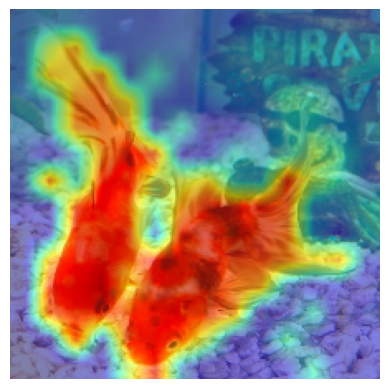

In [4]:
%matplotlib inline
rgb_img2 = image_cpu[0].permute(1, 2, 0).data.cpu().numpy()
rgb_img2=(rgb_img2-rgb_img2.min())/(rgb_img2.max()-rgb_img2.min())
plt.imshow(rgb_img2)
plt.axis('off')
plt.imshow(result, cmap='jet', alpha=0.5)
plt.show()